In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
data = pd.read_csv(r"D:\CREDITSCORE\notebook\creditscore.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13808\670854966.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"D:\CREDITSCORE\notebook\creditscore.csv")


In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
col_name = data.columns
col_name

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [8]:
data.drop(['ID','Name','SSN','Month'],axis=1,inplace=True)

In [9]:
wrong_types = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
               'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [10]:
for col in wrong_types:
    if data[col][data[col] == '_'].any():
        print(col)

Changed_Credit_Limit


In [11]:
data.loc[data.Changed_Credit_Limit == '_','Changed_Credit_Limit'] = np.nan

In [12]:
for col in wrong_types:
    data[col] = data[col].str.replace('_','').astype('float64')

In [13]:
data.dtypes

Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [14]:
numerical = data.select_dtypes(include=['float64','int64']).columns
numerical

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [15]:
categorical = data.select_dtypes(include=['object']).columns
categorical

Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [16]:
(data.Customer_ID.value_counts() == 8).sum()

12500

In [17]:
data.Age = data.groupby('Customer_ID').Age.transform(lambda x : x.mode()[0])
data.Annual_Income = data.groupby('Customer_ID').Annual_Income.transform(lambda x : x.mode()[0])
data.Occupation = data.groupby('Customer_ID').Occupation.transform(lambda x : x.mode()[0])

In [18]:
for col in numerical:    
    if data[col][data[col] < 0].any():
        print(col,len(data[col][data[col] < 0]))

Num_Bank_Accounts 21
Num_of_Loan 3876
Delay_from_due_date 591
Num_of_Delayed_Payment 644
Changed_Credit_Limit 1586
Monthly_Balance 9


In [19]:
data.Num_Bank_Accounts[data.Num_Bank_Accounts < 0].value_counts()

Num_Bank_Accounts
-1    21
Name: count, dtype: int64

In [20]:
data.drop(data[data.Num_Bank_Accounts < 0].index,inplace=True)


In [21]:
data.Num_of_Loan[data.Num_of_Loan<0].value_counts()

Num_of_Loan
-100.0    3875
Name: count, dtype: int64

In [22]:
data.drop(data[data.Num_of_Loan < 0].index,inplace=True)

In [23]:
data.reset_index(drop=True,inplace=True)

In [24]:
for col in numerical:    
    if data[col][data[col] < 0].any():
        print(col,len(data[col][data[col] < 0]))

Delay_from_due_date 559
Num_of_Delayed_Payment 616
Changed_Credit_Limit 1525
Monthly_Balance 9


In [25]:
data.Num_Bank_Accounts[data.Num_Bank_Accounts > 50].value_counts()

Num_Bank_Accounts
803     7
791     5
1668    5
105     5
1257    4
       ..
887     1
211     1
385     1
1221    1
697     1
Name: count, Length: 887, dtype: int64

In [26]:
data.drop(data[data.Num_Bank_Accounts > 50].index,inplace=True)

In [27]:
data.Num_Credit_Card[data.Num_Credit_Card > 50].value_counts()

Num_Credit_Card
849     8
852     7
218     6
183     6
106     6
       ..
1140    1
290     1
414     1
892     1
679     1
Name: count, Length: 1119, dtype: int64

In [28]:
data.drop(data[data.Num_Credit_Card > 50].index,inplace=True)

In [29]:
data.reset_index(drop=True,inplace=True)

In [30]:
data.isnull().sum() 

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13894
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10574
Delay_from_due_date             0
Num_of_Delayed_Payment       6468
Changed_Credit_Limit         1949
Num_Credit_Inquiries         1809
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8418
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4151
Payment_Behaviour               0
Monthly_Balance              2659
Credit_Score                    0
dtype: int64

In [31]:
null_num_cols = ['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']
imputer = SimpleImputer(strategy='mean')
imputed_numerical = pd.DataFrame(imputer.fit_transform(data[null_num_cols]),columns=null_num_cols)
imputed_numerical.isnull().sum()

Monthly_Inhand_Salary      0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Amount_invested_monthly    0
Monthly_Balance            0
dtype: int64

In [32]:
data[null_num_cols] = imputed_numerical

In [33]:
data.isnull().sum()


Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10574
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8418
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [34]:
data.Occupation.value_counts()

Occupation
Lawyer           6566
Engineer         6329
Mechanic         6320
Architect        6303
Scientist        6277
Accountant       6224
Developer        6222
Teacher          6215
Media_Manager    6193
Entrepreneur     6165
Journalist       6086
Doctor           6070
Manager          5965
Musician         5923
Writer           5895
_______             8
Name: count, dtype: int64

In [35]:
data.loc[data.Occupation == '_______','Occupation'] = np.nan


In [36]:
data.Type_of_Loan.value_counts()


Type_of_Loan
Not Specified                                                                                               1296
Credit-Builder Loan                                                                                         1165
Personal Loan                                                                                               1163
Student Loan                                                                                                1160
Debt Consolidation Loan                                                                                     1157
                                                                                                            ... 
Home Equity Loan, Debt Consolidation Loan, Personal Loan, Not Specified, and Mortgage Loan                     4
Auto Loan, Credit-Builder Loan, Payday Loan, Personal Loan, and Student Loan                                   4
Not Specified, Payday Loan, Payday Loan, and Credit-Builder Loan                   

In [37]:
data.Type_of_Loan[data.Type_of_Loan == '_'].any()


False

In [38]:
data.Credit_Mix.value_counts() 


Credit_Mix
Standard    33803
Good        22541
_           18767
Bad         17650
Name: count, dtype: int64

In [39]:
data.loc[data.Credit_Mix == '_', 'Credit_Mix'] = np.nan


<Axes: xlabel='count', ylabel='Credit_Mix'>

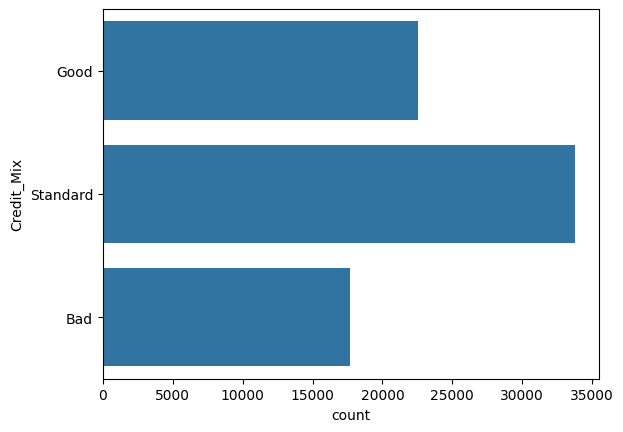

In [40]:
sns.countplot(data.Credit_Mix)


In [41]:
data.Credit_History_Age.value_counts()


Credit_History_Age
19 Years and 4 Months     415
15 Years and 11 Months    415
17 Years and 9 Months     415
19 Years and 5 Months     413
15 Years and 9 Months     410
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       13
33 Years and 7 Months      12
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [42]:
data.Credit_History_Age[data.Credit_History_Age == '_'].any()

False

In [43]:
data.Payment_of_Min_Amount.value_counts()


Payment_of_Min_Amount
Yes    48570
No     33071
NM     11120
Name: count, dtype: int64

In [44]:
data.loc[data.Payment_of_Min_Amount == 'NM','Payment_of_Min_Amount'] = np.nan

<Axes: xlabel='count', ylabel='Payment_of_Min_Amount'>

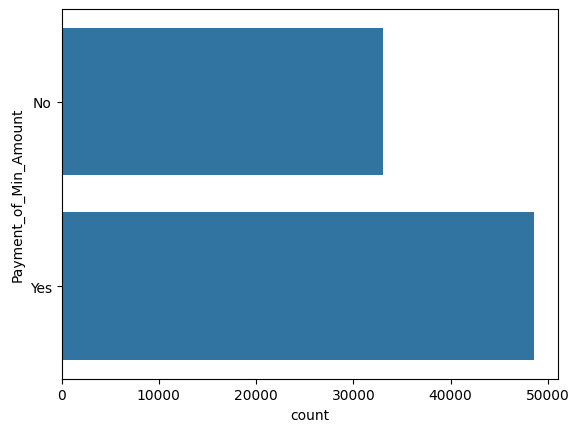

In [45]:
sns.countplot(data.Payment_of_Min_Amount)

In [46]:
data.Payment_Behaviour.value_counts()  


Payment_Behaviour
Low_spent_Small_value_payments      23630
High_spent_Medium_value_payments    16268
Low_spent_Medium_value_payments     12878
High_spent_Large_value_payments     12697
High_spent_Small_value_payments     10534
Low_spent_Large_value_payments       9717
!@9#%8                               7037
Name: count, dtype: int64

In [47]:
data.loc[data.Payment_Behaviour == '!@9#%8','Payment_Behaviour'] = np.nan

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

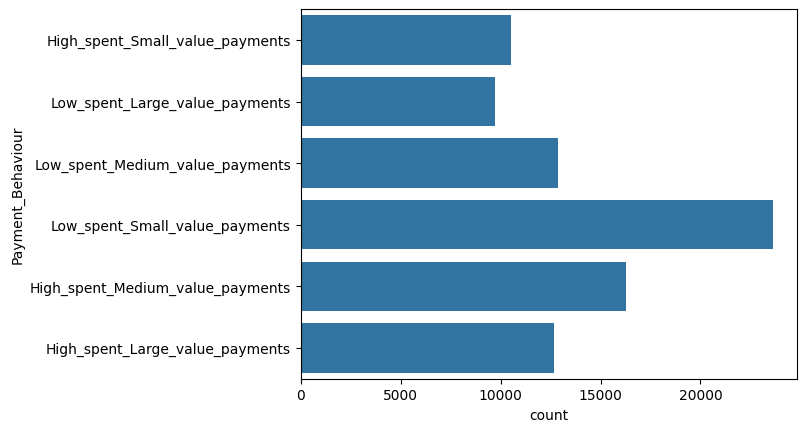

In [48]:
sns.countplot(data.Payment_Behaviour)


In [49]:
data.Credit_Score.value_counts()


Credit_Score
Standard    49370
Poor        26925
Good        16466
Name: count, dtype: int64

In [50]:
data.isnull().sum()


Customer_ID                     0
Age                             0
Occupation                      8
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10574
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  18767
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8418
Payment_of_Min_Amount       11120
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7037
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [51]:
data.drop(['Customer_ID'],axis=1,inplace=True)

In [52]:
categorical = categorical.drop('Customer_ID')
categorical = categorical.drop('Credit_Score')

In [53]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical = pd.DataFrame(imputer.fit_transform(data[categorical]),columns=categorical)

In [54]:
data[categorical] = imputed_categorical


In [55]:
data.isnull().sum()


Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [89]:
data["Credit_Score"] = data["Credit_Score"].map({'Poor':0,'Good':1,'Standard':2})

In [92]:
data["Credit_Score"].unique()
data.to_csv('output.csv', index=False)

In [96]:
pd.read_csv("output.csv").isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

<Axes: >

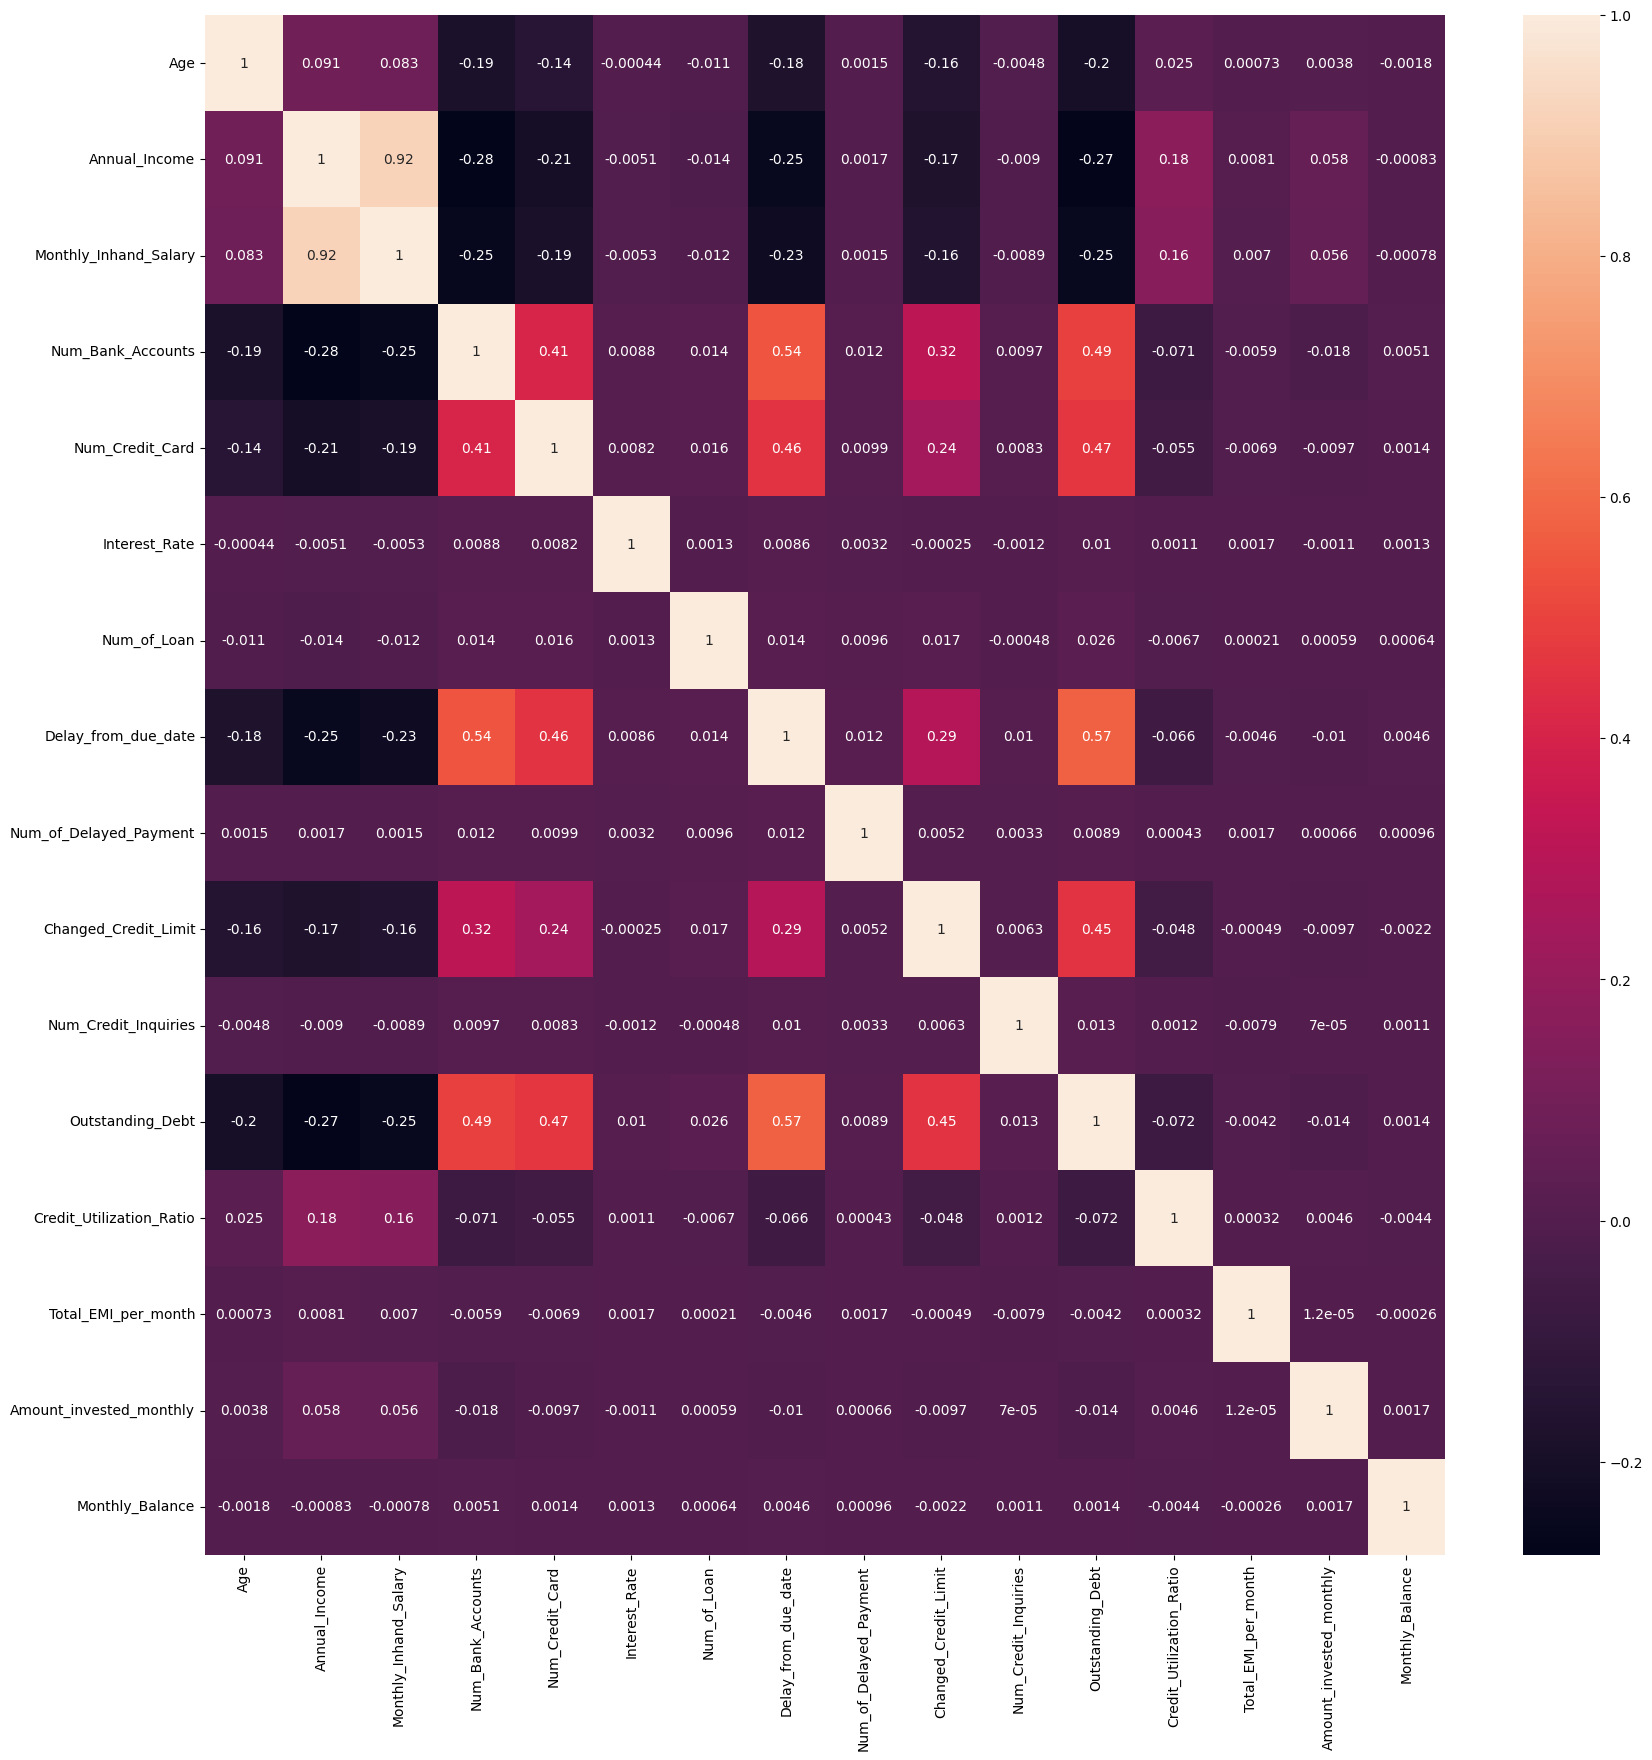

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(data[numerical].corr(),annot=True)

<Axes: >

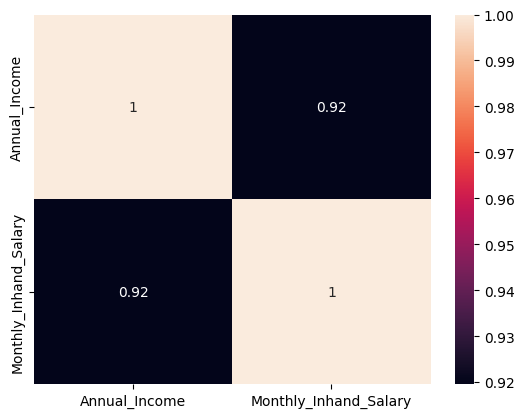

In [58]:
sns.heatmap(data[['Annual_Income','Monthly_Inhand_Salary']].corr(),annot=True)

In [59]:
data.drop(['Monthly_Inhand_Salary'],axis=1,inplace=True)


In [60]:
numerical = numerical.drop('Monthly_Inhand_Salary')
numerical

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [61]:
data[numerical] = StandardScaler().fit_transform(data[numerical])

In [62]:
for col in categorical:
    data[col] = LabelEncoder().fit_transform(data[col])

In [63]:
data[categorical]

,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
0,12,128,2,180,0,2
1,12,128,1,86,0,3
2,12,128,1,184,0,4
3,12,128,1,185,0,5
4,12,128,1,186,0,1
...,...,...,...,...,...,...
92756,9,683,2,307,0,0
92757,9,683,2,308,0,1
92758,9,683,1,309,0,0
92759,9,683,1,310,0,3


In [64]:
data[numerical]

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.954105,-0.820027,-0.895523,-0.710267,-0.149029,-0.052505,-1.215683,-1.099419e-01,1.302151e-01,-0.124469,-0.533729,-1.068518,-0.163218,-0.278789,1.014124e-02
1,-0.954105,-0.820027,-0.895523,-0.710267,-0.149029,-0.052505,-1.484870,1.616897e-17,1.302151e-01,-0.124469,-0.533729,-0.067286,-0.163218,-0.259810,1.014124e-02
2,-0.954105,-0.820027,-0.895523,-0.710267,-0.149029,-0.052505,-1.215683,-1.099419e-01,2.640080e-16,-0.124469,-0.533729,-0.719277,-0.163218,-0.278146,1.014124e-02
3,-0.954105,-0.820027,-0.895523,-0.710267,-0.149029,-0.052505,-1.081090,-1.235954e-01,-6.129015e-01,-0.124469,-0.533729,-0.178134,-0.163218,-0.219120,1.014124e-02
4,-0.954105,-0.820027,-0.895523,-0.710267,-0.149029,-0.052505,-1.013793,1.616897e-17,1.302151e-01,-0.124469,-0.533729,-1.464385,-0.163218,-0.298335,1.014124e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92756,-0.768403,-0.284616,-0.519324,0.207602,-0.140505,-0.085666,0.130251,-1.099419e-01,1.643984e-01,-0.129694,-0.799768,0.464103,-0.164958,-0.288535,-1.277510e-18
92757,-0.768403,-0.284616,-0.519324,0.207602,-0.140505,-0.085666,-0.206233,-1.099419e-01,1.643984e-01,-0.129694,-0.799768,1.617742,-0.164958,-0.291936,-1.277510e-18
92758,-0.768403,-0.284616,-0.519324,0.207602,12.053948,-0.085666,0.399437,-1.144930e-01,1.643984e-01,-0.129694,-0.799768,1.752590,-0.164958,-0.307052,-1.277510e-18
92759,-0.768403,-0.284616,-0.519324,0.207602,-0.140505,-0.085666,-0.071639,1.616897e-17,1.643984e-01,-0.129694,-0.799768,0.263682,-0.164958,-0.192949,-1.277510e-18


In [65]:
X = data.drop('Credit_Score',axis=1)
y = data.Credit_Score

In [66]:
y.value_counts()

Credit_Score
Standard    49370
Poor        26925
Good        16466
Name: count, dtype: int64

In [67]:
y = y.map({'Poor':0,'Good':1,'Standard':2})

In [68]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((74208, 21), (18553, 21))

In [69]:
model_rfc = RandomForestClassifier(random_state=1234)
model_rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=1234)

In [70]:
y_pred = model_rfc.predict(x_test)

In [71]:
print(classification_report(y_test,y_pred))
print("accuracy_score", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      5293
           1       0.75      0.73      0.74      3251
           2       0.82      0.81      0.82     10009

    accuracy                           0.80     18553
   macro avg       0.79      0.78      0.78     18553
weighted avg       0.80      0.80      0.80     18553

accuracy_score 0.798038053145044


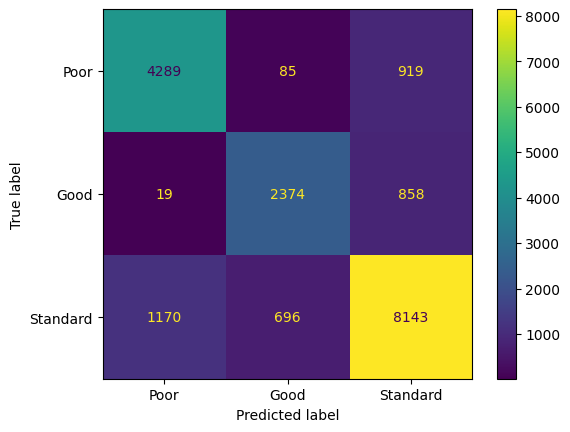

In [72]:
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()


accuracy_score 0.7611707001563089
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      5293
           1       0.68      0.68      0.68      3251
           2       0.79      0.80      0.79     10009

    accuracy                           0.76     18553
   macro avg       0.74      0.74      0.74     18553
weighted avg       0.76      0.76      0.76     18553



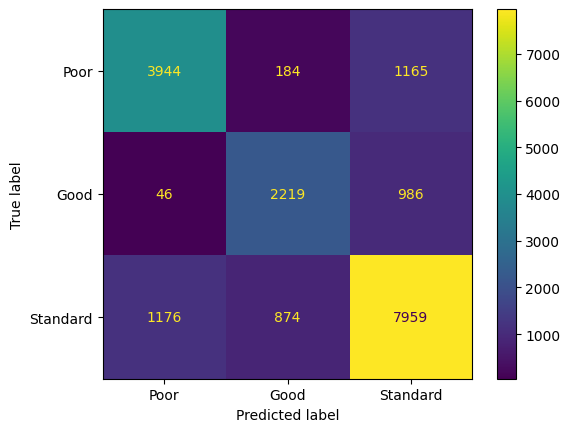

In [73]:
model = XGBClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("accuracy_score", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()

In [74]:
model = CatBoostClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
# confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Poor','Good','Standard'])
# confusion_matrixDisply.plot()

Learning rate set to 0.098564
0:	learn: 1.0369908	total: 142ms	remaining: 2m 21s
1:	learn: 0.9884776	total: 175ms	remaining: 1m 27s
2:	learn: 0.9480281	total: 207ms	remaining: 1m 8s
3:	learn: 0.9139904	total: 235ms	remaining: 58.4s
4:	learn: 0.8859311	total: 261ms	remaining: 51.9s
5:	learn: 0.8614507	total: 288ms	remaining: 47.7s
6:	learn: 0.8408871	total: 316ms	remaining: 44.8s
7:	learn: 0.8249443	total: 343ms	remaining: 42.5s
8:	learn: 0.8095158	total: 373ms	remaining: 41s
9:	learn: 0.7958784	total: 399ms	remaining: 39.5s
10:	learn: 0.7843223	total: 427ms	remaining: 38.4s
11:	learn: 0.7745967	total: 454ms	remaining: 37.4s
12:	learn: 0.7651788	total: 482ms	remaining: 36.6s
13:	learn: 0.7573037	total: 509ms	remaining: 35.8s
14:	learn: 0.7499377	total: 536ms	remaining: 35.2s
15:	learn: 0.7434163	total: 569ms	remaining: 35s
16:	learn: 0.7383974	total: 595ms	remaining: 34.4s
17:	learn: 0.7330918	total: 626ms	remaining: 34.1s
18:	learn: 0.7288416	total: 657ms	remaining: 33.9s
19:	learn: 0.

In [75]:
from sklearn.svm import SVC

In [76]:
# model_svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
# model_svc

In [77]:
# model_svc.fit(x_train, y_train)

In [78]:
# y_pred = model_svc.predict(x_test)
# print(classification_report(y_test,y_pred))
# print("accuracy_score", accuracy_score(y_test,y_pred))

In [80]:
from sklearn.linear_model import LogisticRegression

In [87]:
logistic_regression = LogisticRegression(max_iter=10000, random_state=42)

In [88]:
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.62485851344796
              precision    recall  f1-score   support

           0       0.63      0.46      0.53      5293
           1       0.56      0.45      0.50      3251
           2       0.64      0.77      0.70     10009

    accuracy                           0.62     18553
   macro avg       0.61      0.56      0.58     18553
weighted avg       0.62      0.62      0.61     18553

